In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# 1. Principal Components Analysis

In [2]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [3]:
states = pd.read_csv('data/USArrests.csv', index_col=0)
states.head()

,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


In [4]:
states.columns

Index(['Murder', 'Assault', 'UrbanPop', 'Rape'], dtype='object')

In [5]:
states.mean(axis=0).round(2)

Murder        7.79
Assault     170.76
UrbanPop     65.54
Rape         21.23
dtype: float64

In [6]:
states.var(axis=0).round(1)

Murder        19.0
Assault     6945.2
UrbanPop     209.5
Rape          87.7
dtype: float64

In [7]:
pr = Pipeline([
    ('scale', StandardScaler()),
    ('pca', PCA(random_state=42))
])

pr.fit(states)

Pipeline(steps=[('scale', StandardScaler()), ('pca', PCA(random_state=42))])

In [8]:
pca_loadings = pd.DataFrame(
    pr['pca'].components_.T, 
    columns=['V1', 'V2', 'V3', 'V4'],
    index=['Murder', 'Assault', 'UrbanPop', 'Rape']
)
pca_loadings

,V1,V2,V3,V4
Murder,0.535899,0.418181,-0.341233,0.649228
Assault,0.583184,0.187986,-0.268148,-0.743407
UrbanPop,0.278191,-0.872806,-0.378016,0.133878
Rape,0.543432,-0.167319,0.817778,0.089024


In [9]:
df_plot = pd.DataFrame(
    pr.transform(states),
    columns=['PC1', 'PC2', 'PC3', 'PC4'],
    index=states.index
)
df_plot.shape

(50, 4)

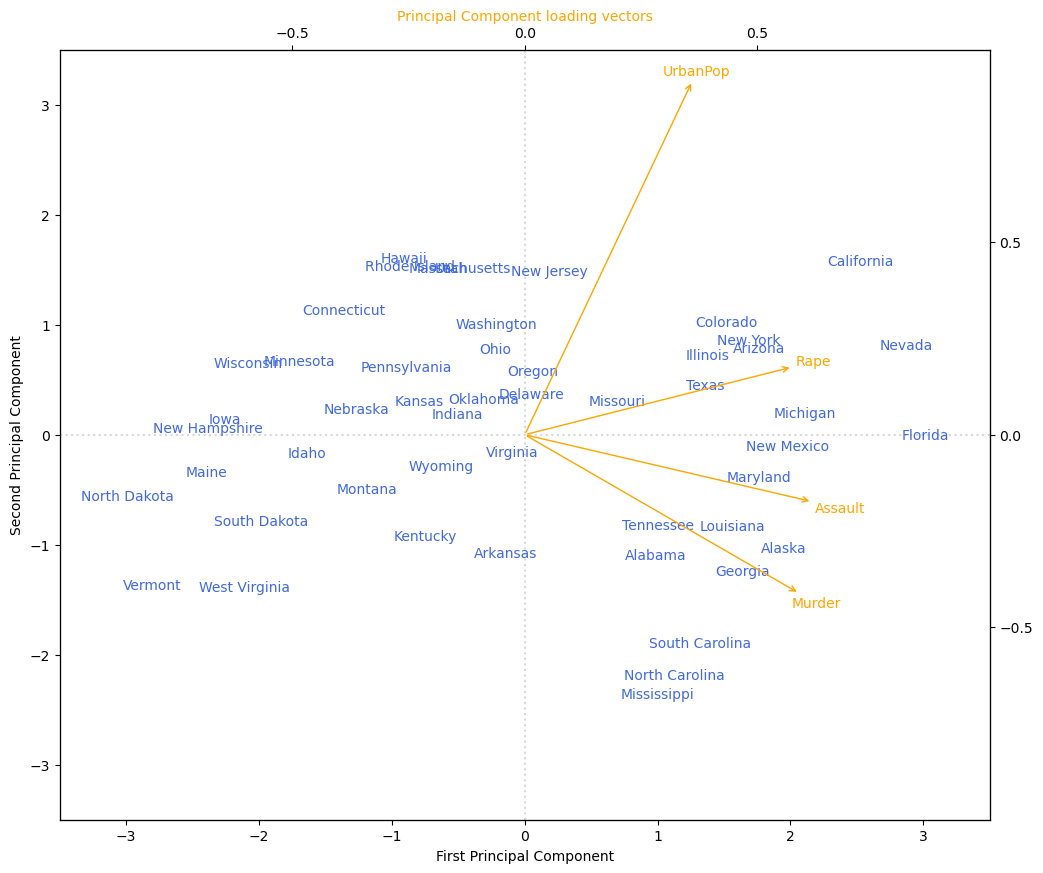

In [10]:
fig , ax1 = plt.subplots(figsize=(12,10))

ax1.set_xlim(-3.5,3.5)
ax1.set_ylim(-3.5,3.5)

# plot Principal Components 1 and 2
for i in df_plot.index:
    ax1.annotate(i, (df_plot.PC1.loc[i], -df_plot.PC2.loc[i]), ha='center', c='royalblue')

# plot reference lines
ax1.hlines(0,-3.5,3.5, linestyles='dotted', colors='grey', alpha=0.3)
ax1.vlines(0,-3.5,3.5, linestyles='dotted', colors='grey', alpha=0.3)

ax1.set_xlabel('First Principal Component')
ax1.set_ylabel('Second Principal Component')
    
# plot Principal Component loading vectors, using a second y-axis.
ax2 = ax1.twinx().twiny() 

ax2.set_ylim(-1,1)
ax2.set_xlim(-1,1)
ax2.set_xticks([-0.5, 0, 0.5])
ax2.set_yticks([-0.5, 0, 0.5])
ax2.tick_params(axis='y', colors='orange')
ax2.set_xlabel('Principal Component loading vectors', color='orange')

# plot labels for vectors. Variable 'a' is a small offset parameter to separate arrow tip and text.
a = 1.07  
for i in pca_loadings[['V1', 'V2']].index:
    ax2.annotate(i, (0, 0), (pca_loadings.V1.loc[i]*a, -pca_loadings.V2.loc[i]*a), color='orange', arrowprops={'arrowstyle': '<-', 'color': 'orange'})

In [11]:
pr['pca'].explained_variance_

array([2.53085875, 1.00996444, 0.36383998, 0.17696948])

In [12]:
pve = pr['pca'].explained_variance_ratio_
pve

array([0.62006039, 0.24744129, 0.0891408 , 0.04335752])

[(-0.05, 1.05),
 Text(0, 0.5, 'Cumulative Proportion of Variance Explained'),
 Text(0.5, 0, 'Principal Component')]

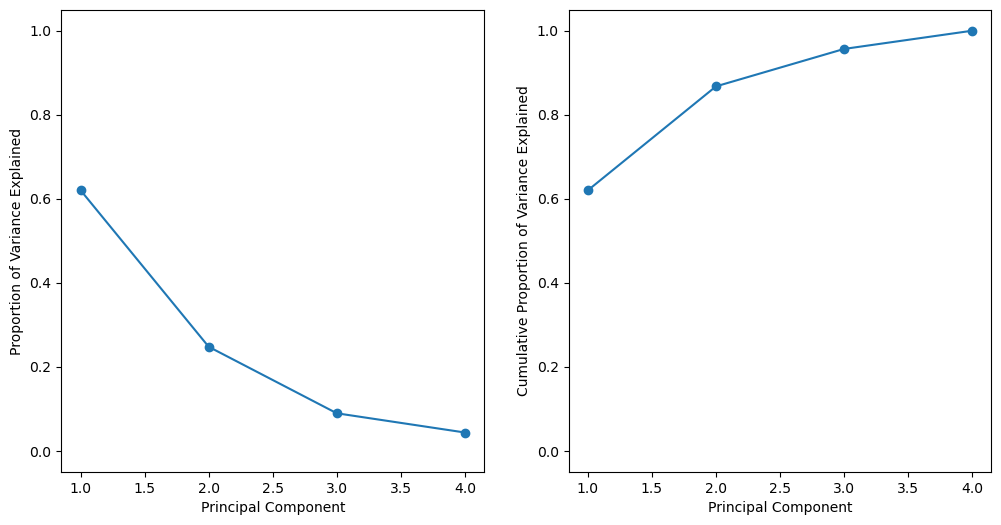

In [13]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

ax1.plot(np.arange(1, 5), pve, '-o')
ax1.set(ylim=(-0.05, 1.05), ylabel='Proportion of Variance Explained',
        xlabel='Principal Component')

ax2.plot(np.arange(1, 5), pve.cumsum(), '-o')
ax2.set(ylim=(-0.05, 1.05), ylabel='Cumulative Proportion of Variance Explained',
        xlabel='Principal Component')

# 2. Matrix Completion

In [14]:
X = StandardScaler().fit_transform(states)

In [15]:
pca = PCA().fit(X)

In [16]:
pca.components_.T

array([[ 0.53589947,  0.41818087, -0.34123273,  0.6492278 ],
       [ 0.58318363,  0.1879856 , -0.26814843, -0.74340748],
       [ 0.27819087, -0.87280619, -0.37801579,  0.13387773],
       [ 0.54343209, -0.16731864,  0.81777791,  0.08902432]])

In [17]:
pca.explained_variance_ratio_

array([0.62006039, 0.24744129, 0.0891408 , 0.04335752])

In [18]:
u, s, vh = np.linalg.svd(X)

In [19]:
vh.T

array([[-0.53589947,  0.41818087, -0.34123273,  0.6492278 ],
       [-0.58318363,  0.1879856 , -0.26814843, -0.74340748],
       [-0.27819087, -0.87280619, -0.37801579,  0.13387773],
       [-0.54343209, -0.16731864,  0.81777791,  0.08902432]])

In [20]:
pca.components_.T

array([[ 0.53589947,  0.41818087, -0.34123273,  0.6492278 ],
       [ 0.58318363,  0.1879856 , -0.26814843, -0.74340748],
       [ 0.27819087, -0.87280619, -0.37801579,  0.13387773],
       [ 0.54343209, -0.16731864,  0.81777791,  0.08902432]])

In [21]:
sigma = np.zeros((50, 4))
sigma[[0, 1, 2, 3], [0, 1, 2, 3]] = s
(u @ sigma)[:5]

array([[-0.98556588,  1.13339238, -0.44426879,  0.15626714],
       [-1.95013775,  1.07321326,  2.04000333, -0.43858344],
       [-1.76316354, -0.74595678,  0.05478082, -0.83465292],
       [ 0.14142029,  1.11979678,  0.11457369, -0.1828109 ],
       [-2.52398013, -1.54293399,  0.5985568 , -0.34199648]])

In [22]:
pca.transform(X)[:5]

array([[ 0.98556588,  1.13339238, -0.44426879,  0.15626714],
       [ 1.95013775,  1.07321326,  2.04000333, -0.43858344],
       [ 1.76316354, -0.74595678,  0.05478082, -0.83465292],
       [-0.14142029,  1.11979678,  0.11457369, -0.1828109 ],
       [ 2.52398013, -1.54293399,  0.5985568 , -0.34199648]])

In [23]:
nomit = 20
np.random.seed(15)

ina = np.random.choice(range(50), nomit, replace=False)
inb = np.random.choice(range(4), nomit)
Xna = X.copy()
Xna[ina, inb] = np.nan

In [24]:
def svd_matrix_completion(X: np.ndarray, M=1):
    u, s, vh = np.linalg.svd(X)
    return ((u[:, :M] * s[:M, ]) @ vh[:M, :])

In [25]:
Xhat = Xna.copy()
Xbar = np.nanmean(Xna, axis=0)
Xhat[ina, inb] = Xbar[inb]

In [26]:
thresh = 1e-7
rel_err = 1
iters = 0

In [27]:
ismiss = np.isnan(Xna)
mss0 = np.mean(Xna[~ismiss] ** 2)
mssold = np.mean((Xna - Xbar)[~ismiss] ** 2)  # mean squared error of the non-missing elements of the old version of Xhat

In [28]:
while (rel_err > thresh):
    iters += 1
    # Step 2(a)
    Xapp = svd_matrix_completion(Xhat, M=1)
    # Step 2(b)
    Xhat[ismiss] = Xapp[ismiss]
    # Step 2(c)
    mss = np.mean((Xna - Xapp)[~ismiss] ** 2)
    rel_err = (mssold - mss) / mss0
    mssold = mss
    print(f'Iter: {iters} MSS: {mss}, Rel. Err: {rel_err}')

Iter: 1 MSS: 0.395496868021452, Rel. Err: 0.5949981176790768
Iter: 2 MSS: 0.3823635703884647, Rel. Err: 0.013329920203005946
Iter: 3 MSS: 0.3809438961799873, Rel. Err: 0.0014409285803237098
Iter: 4 MSS: 0.3807671719014562, Rel. Err: 0.00017937007114165115
Iter: 5 MSS: 0.380741789088676, Rel. Err: 2.5762826545405363e-05
Iter: 6 MSS: 0.38073762752826845, Rel. Err: 4.223864386761429e-06
Iter: 7 MSS: 0.3807368739100018, Rel. Err: 7.649009135680524e-07
Iter: 8 MSS: 0.38073672854104257, Rel. Err: 1.475453219037055e-07
Iter: 9 MSS: 0.3807366994545178, Rel. Err: 2.9521987901243205e-08


In [29]:
np.corrcoef(Xapp[ismiss], X[ismiss])

array([[1.        , 0.71135674],
       [0.71135674, 1.        ]])

# 3. Clustering

## K-Means Clustering

In [30]:
from sklearn.cluster import KMeans

In [31]:
np.random.seed(2)

X = np.random.randn(50, 2)
X[:25, 0] = X[:25, 0] + 3
X[:25, 1] = X[:25, 1] - 4

In [32]:
km = KMeans(n_clusters=2, n_init=20).fit(X)
km.labels_

F:\anacoda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1])

Text(0.5, 0.98, 'K- Means Clustering Results with K = 2')

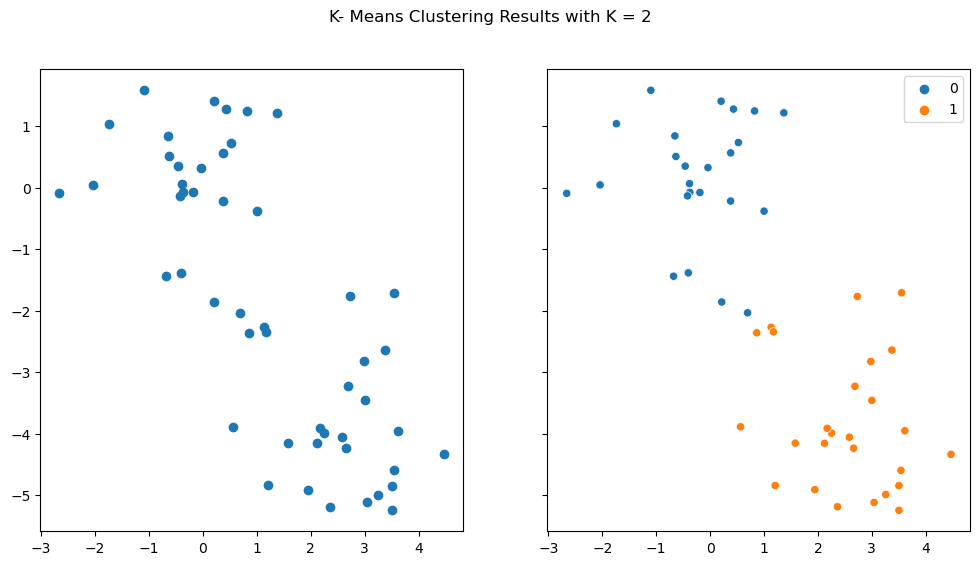

In [33]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6), 
                               sharex=True, sharey=True)

ax1.scatter(X[:, 0], X[:, 1])
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=km.labels_)

plt.suptitle('K- Means Clustering Results with K = 2')

In [34]:
km2 = KMeans(n_clusters=3, n_init=20).fit(X)
km2.labels_

F:\anacoda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 2,
       0, 0, 0, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1,
       1, 1, 1, 1, 1, 2])

In [35]:
km2.cluster_centers_

array([[ 2.82805911, -4.11351797],
       [-0.27876523,  0.51224152],
       [ 0.69945422, -2.14934345]])

Text(0.5, 1.0, 'K- Means Clustering Results with K = 3')

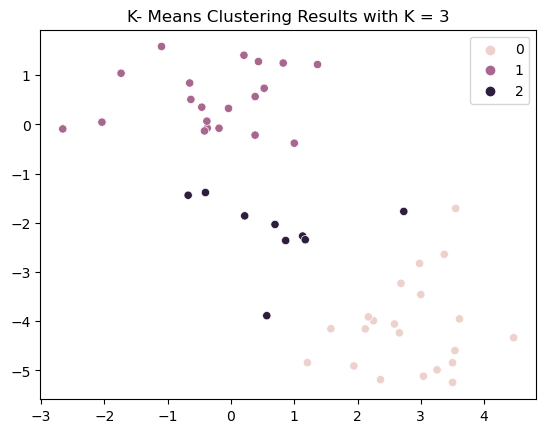

In [36]:
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=km2.labels_)
plt.title('K- Means Clustering Results with K = 3')

In [37]:
KMeans(n_clusters=3, n_init=1, random_state=4).fit(X).inertia_

F:\anacoda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


68.97379200939724

In [38]:
KMeans(n_clusters=3, n_init=20, random_state=4).fit(X).inertia_

F:\anacoda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


68.97379200939724

## Hierarchical Clustering

In [39]:
from scipy.cluster.hierarchy import linkage, dendrogram, cut_tree

In [40]:
hc_complete = linkage(X, 'complete')

In [41]:
hc_average = linkage(X, 'average')
hc_single = linkage(X, 'single')

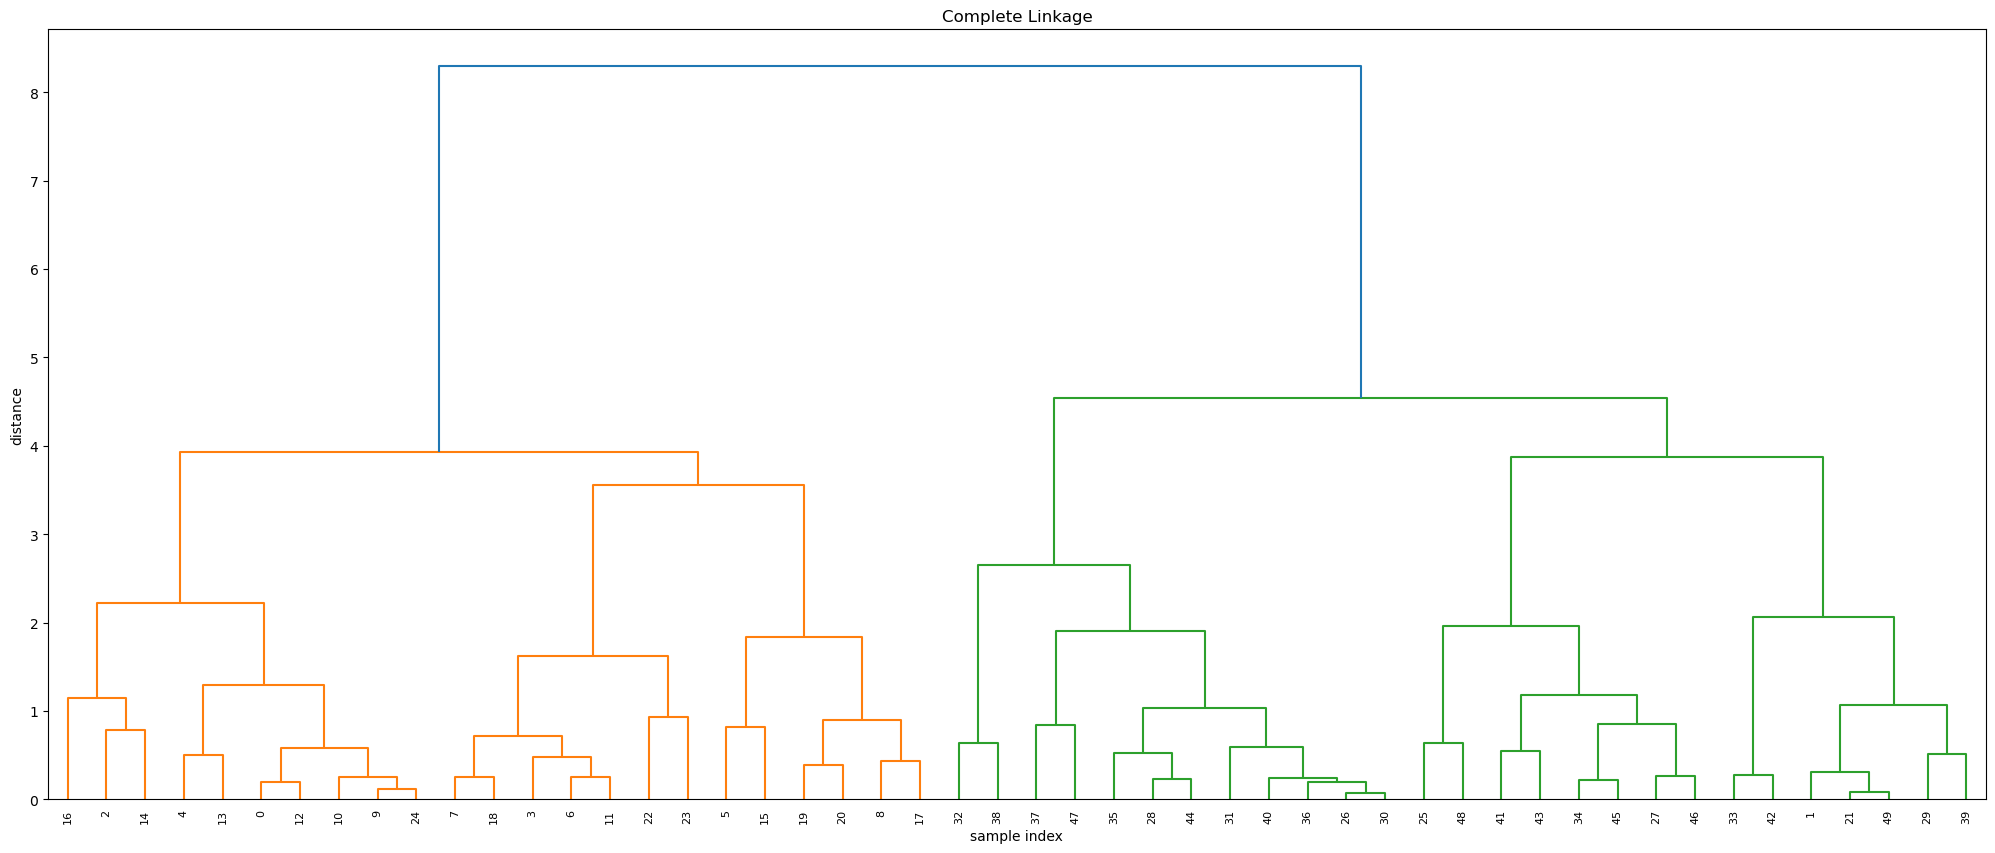

In [42]:
plt.figure(figsize=(25, 10))
plt.title('Complete Linkage')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    hc_complete,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)
plt.show()

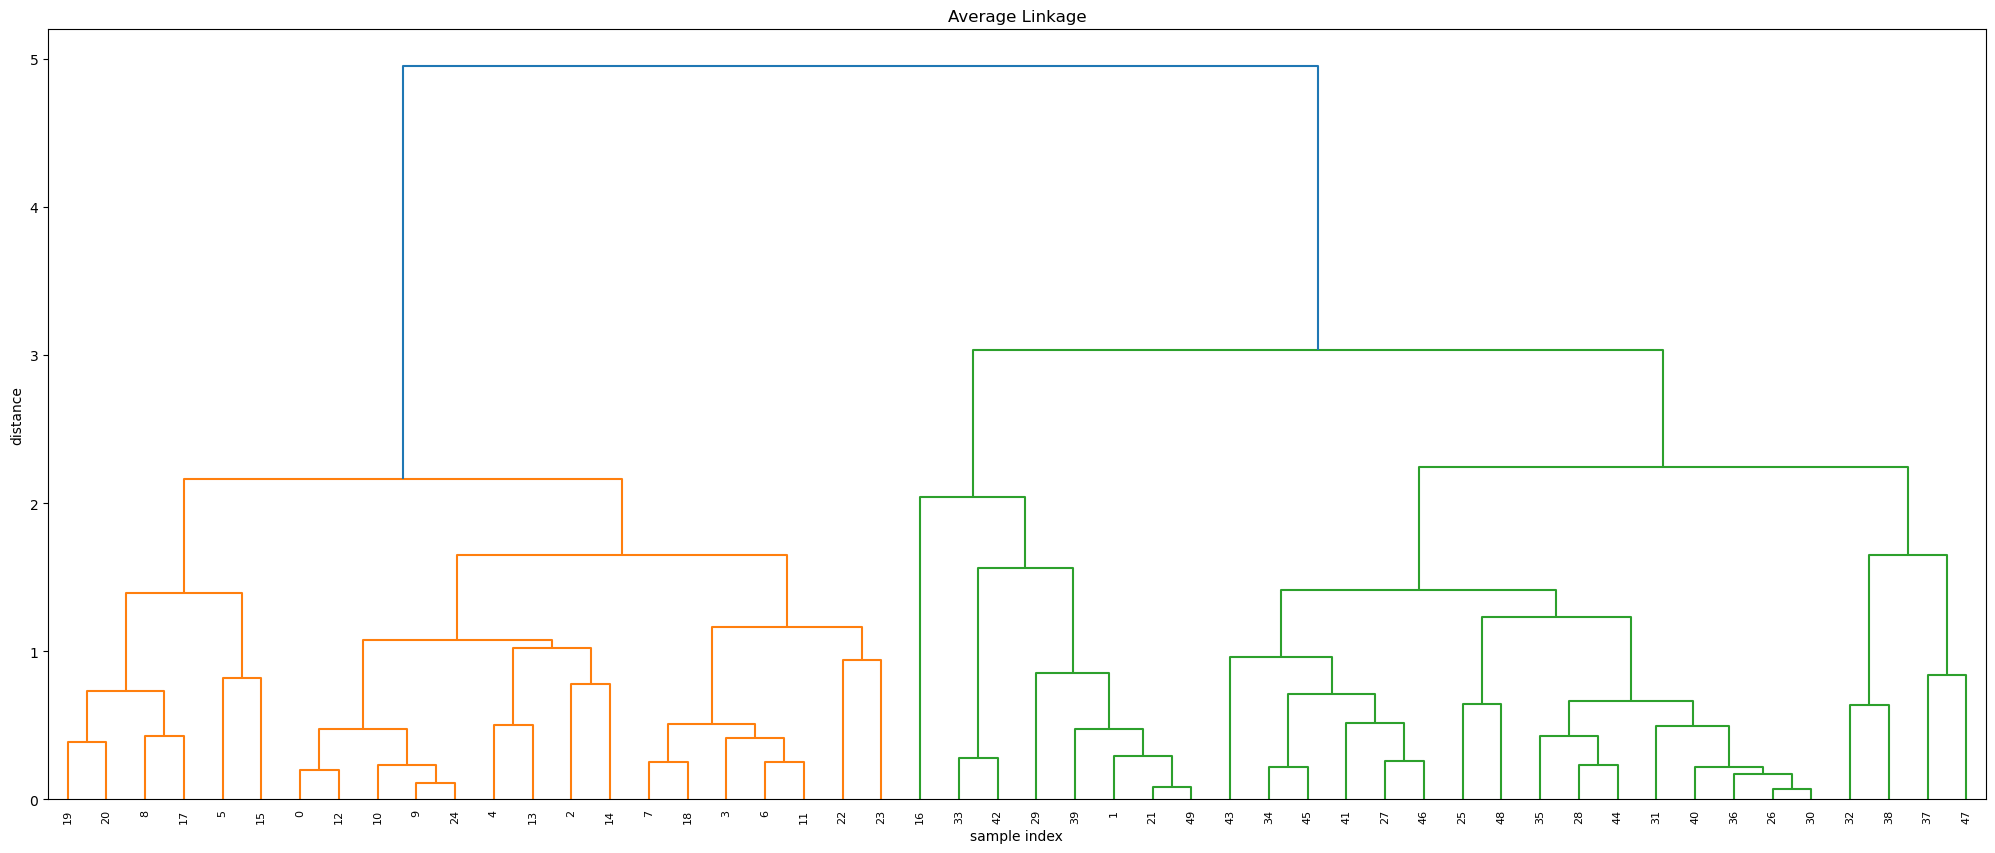

In [43]:
plt.figure(figsize=(25, 10))
plt.title('Average Linkage')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    hc_average,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)
plt.show()

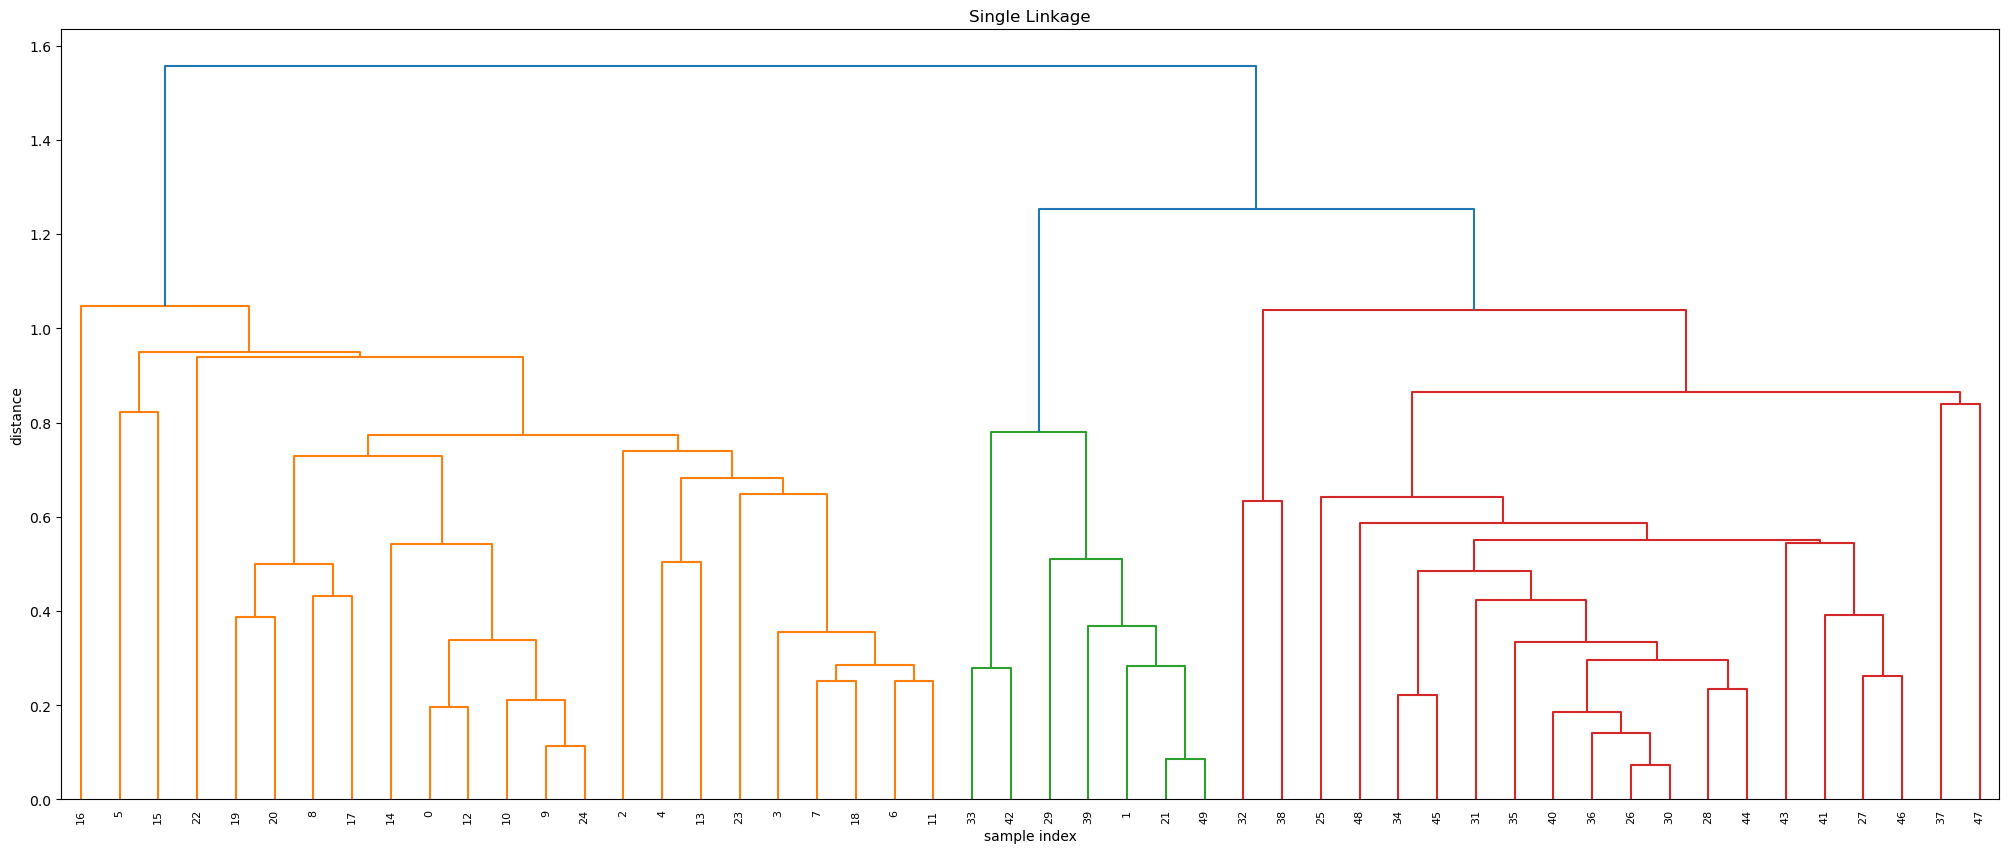

In [44]:
plt.figure(figsize=(25, 10))
plt.title('Single Linkage')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    hc_single,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)
plt.show()

In [45]:
cut_tree(hc_complete, 2).squeeze()

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1])

In [46]:
cut_tree(hc_average, 2).squeeze()

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1])

In [47]:
cut_tree(hc_single, 2).squeeze()

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1])

In [48]:
cut_tree(hc_single, 4).squeeze()

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 1,
       0, 0, 0, 3, 3, 3, 3, 1, 3, 3, 3, 1, 3, 3, 3, 3, 3, 1, 3, 3, 1, 3,
       3, 3, 3, 3, 3, 1])

In [49]:
X_sc = (X - X.mean(axis=0)) / X.std(axis=0)

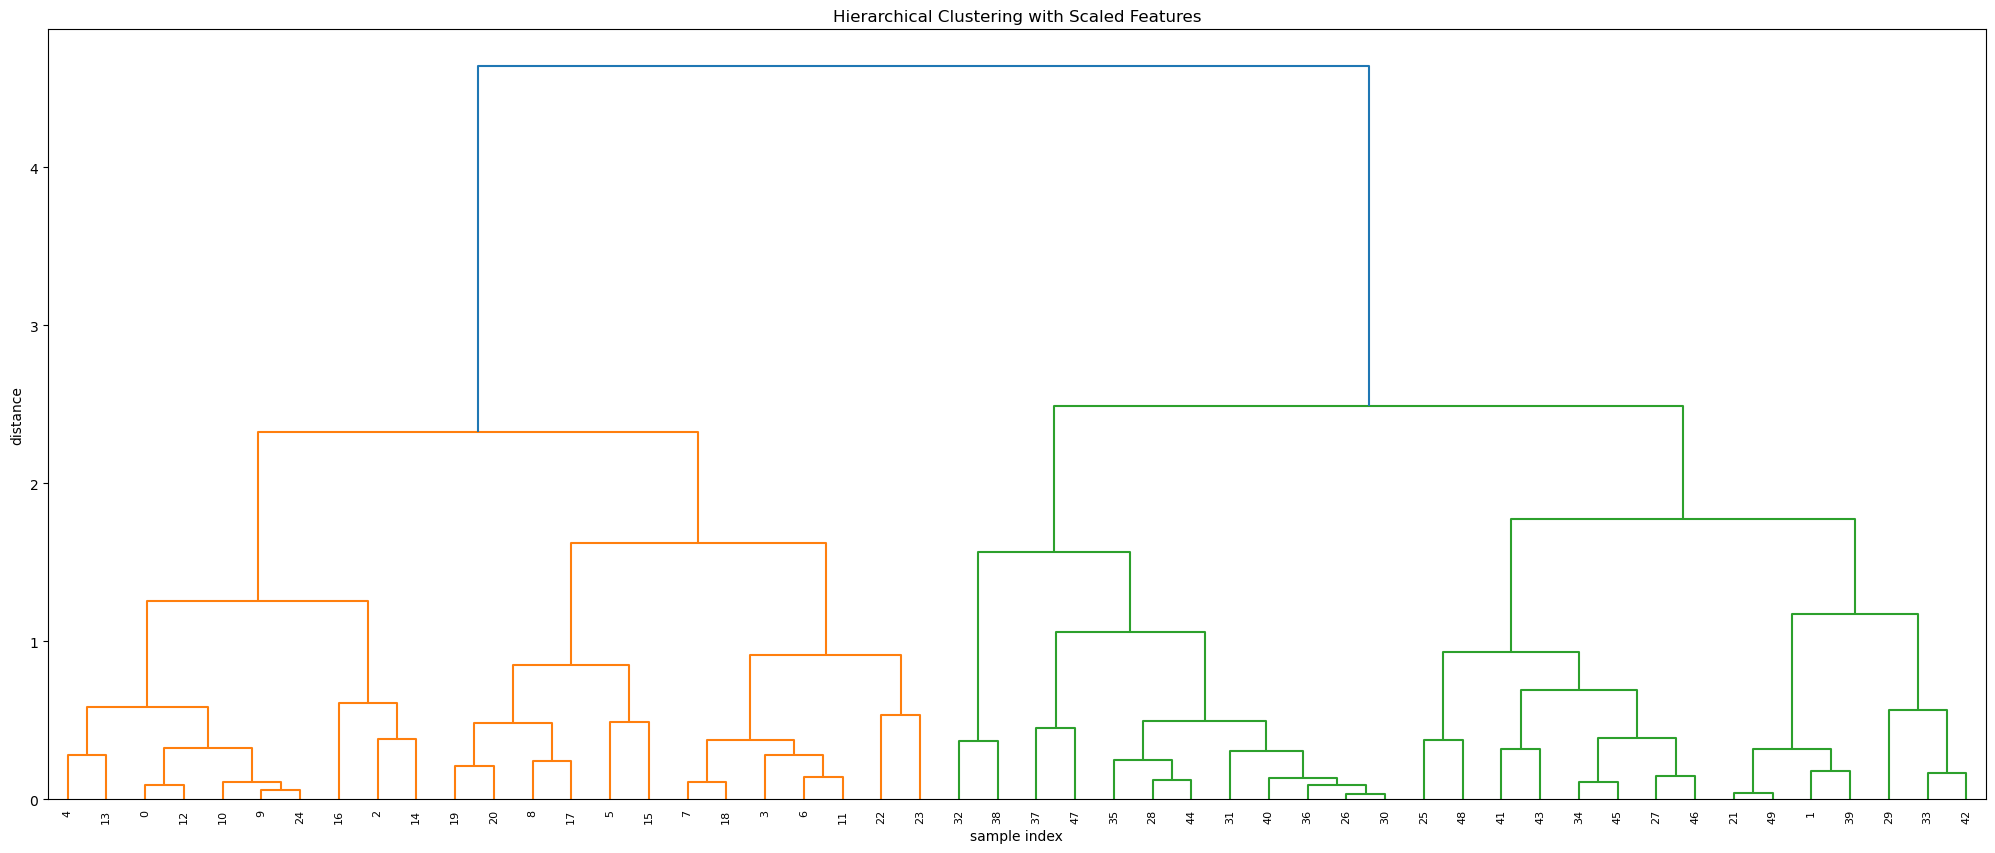

In [50]:
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering with Scaled Features')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    linkage(X_sc, 'complete'),
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)
plt.show()

In [51]:
X = np.random.randn(30, 3)

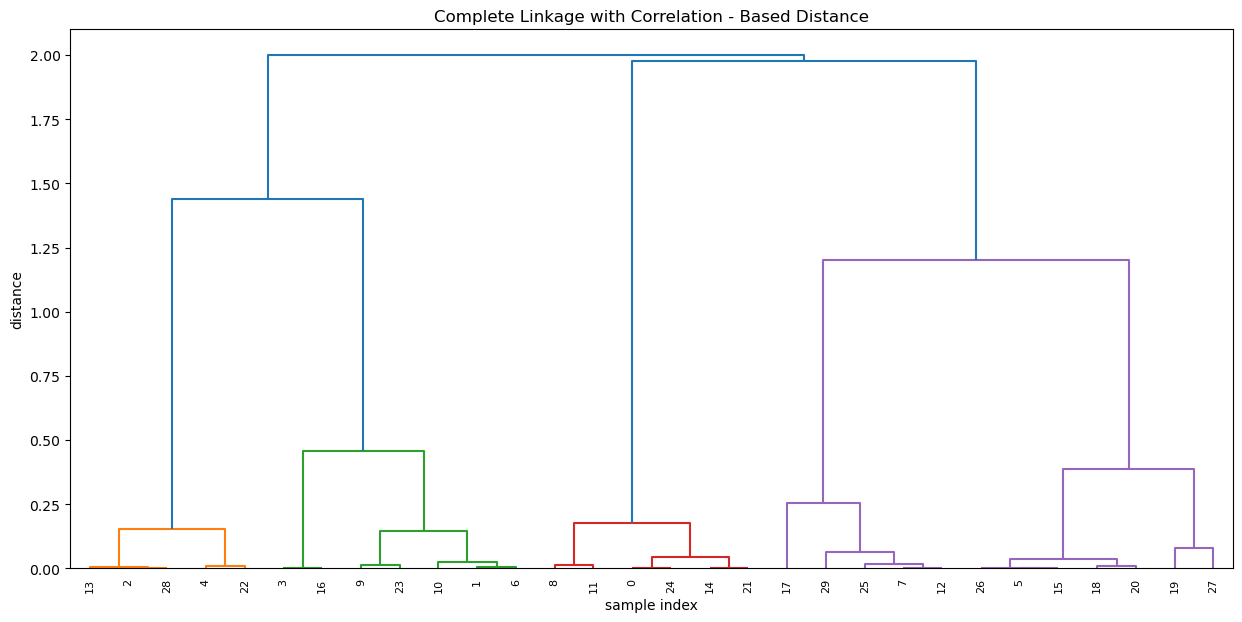

In [52]:
plt.figure(figsize=(15, 7))
plt.title('Complete Linkage with Correlation - Based Distance')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    linkage(X, 'complete', 'correlation'),
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)
plt.show()

# 4. NCI60 Data Example

In [53]:
import statsmodels.api as sm

In [54]:
nci = sm.datasets.get_rdataset('NCI60', 'ISLR').data

In [55]:
nci_labs = nci.iloc[:, -1]
nci_data = nci.iloc[:, :-1]

In [56]:
nci_data.shape

(64, 6830)

In [57]:
nci_labs[:4]

V1      CNS
V2      CNS
V3      CNS
V4    RENAL
Name: labs, dtype: object

In [58]:
nci_labs.value_counts()

RENAL          9
NSCLC          9
MELANOMA       8
BREAST         7
COLON          7
OVARIAN        6
LEUKEMIA       6
CNS            5
PROSTATE       2
UNKNOWN        1
K562B-repro    1
K562A-repro    1
MCF7A-repro    1
MCF7D-repro    1
Name: labs, dtype: int64

## PCA on the NCI60 Data

In [59]:
pr = Pipeline([
    ('scale', StandardScaler()),
    ('pca', PCA())
]).fit(nci_data)

In [60]:
pr_out = pr.transform(nci_data)

In [61]:
pr_out.shape

(64, 64)

[Text(0.5, 0, 'Z1'), Text(0, 0.5, 'Z3')]

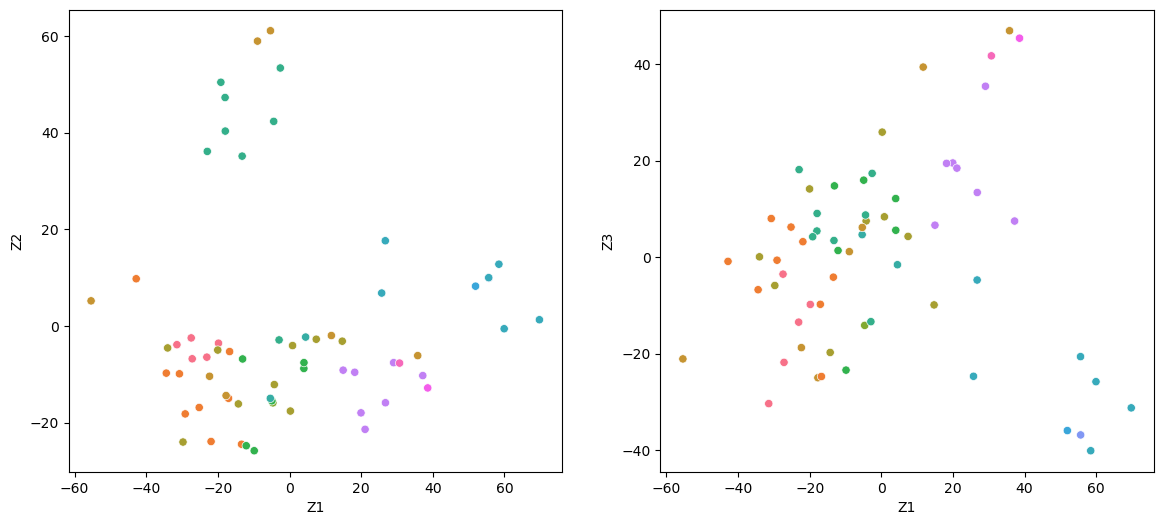

In [62]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6), sharex=True)

sns.scatterplot(x=pr_out[:, 0], y=pr_out[:, 1], hue=nci_labs, legend=False, ax=ax1)
ax1.set(xlabel='Z1', ylabel='Z2')

sns.scatterplot(x=pr_out[:, 0], y=pr_out[:, 2], hue=nci_labs, legend=False, ax=ax2)
ax2.set(xlabel='Z1', ylabel='Z3')

In [63]:
pr['pca'].explained_variance_ratio_[:5]

array([0.11358942, 0.06756203, 0.05751842, 0.04247554, 0.03734972])

In [64]:
pr['pca'].explained_variance_ratio_.cumsum()[:5]

array([0.11358942, 0.18115144, 0.23866987, 0.28114541, 0.31849513])

[Text(0.5, 0, ' Principal Component'), Text(0, 0.5, 'Cumulative PVE')]

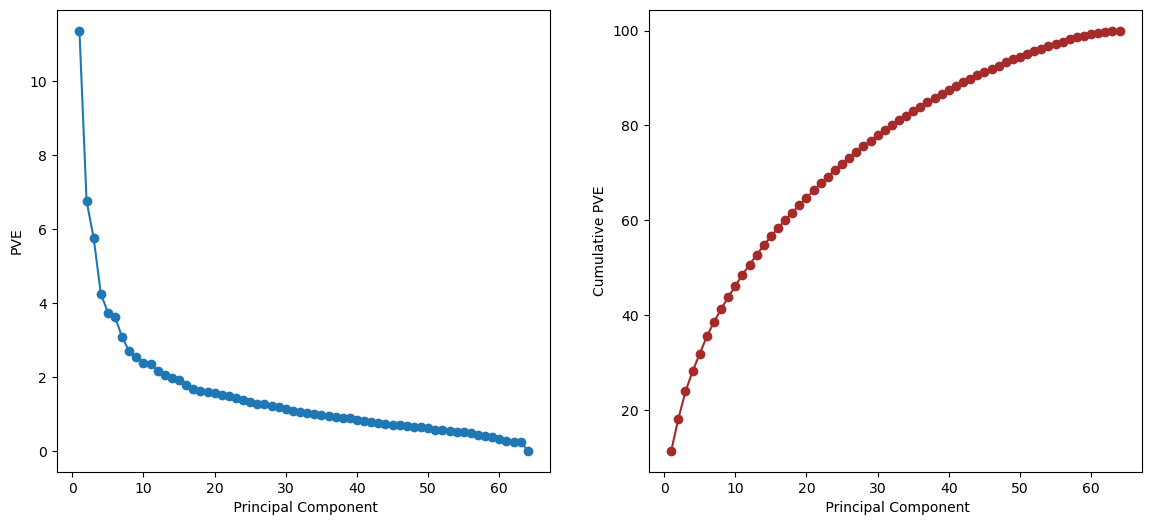

In [65]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6), sharex=True)

ax1.plot(np.arange(1, 65), 100*pr['pca'].explained_variance_ratio_, '-o')
ax1.set(xlabel=' Principal Component', ylabel='PVE')

ax2.plot(np.arange(1, 65), 100*pr['pca'].explained_variance_ratio_.cumsum(), 
         '-o', c='brown')
ax2.set(xlabel=' Principal Component', ylabel='Cumulative PVE')

## Clustering the Observations of the NCI60 Data

In [66]:
sd_data = StandardScaler().fit_transform(nci_data)

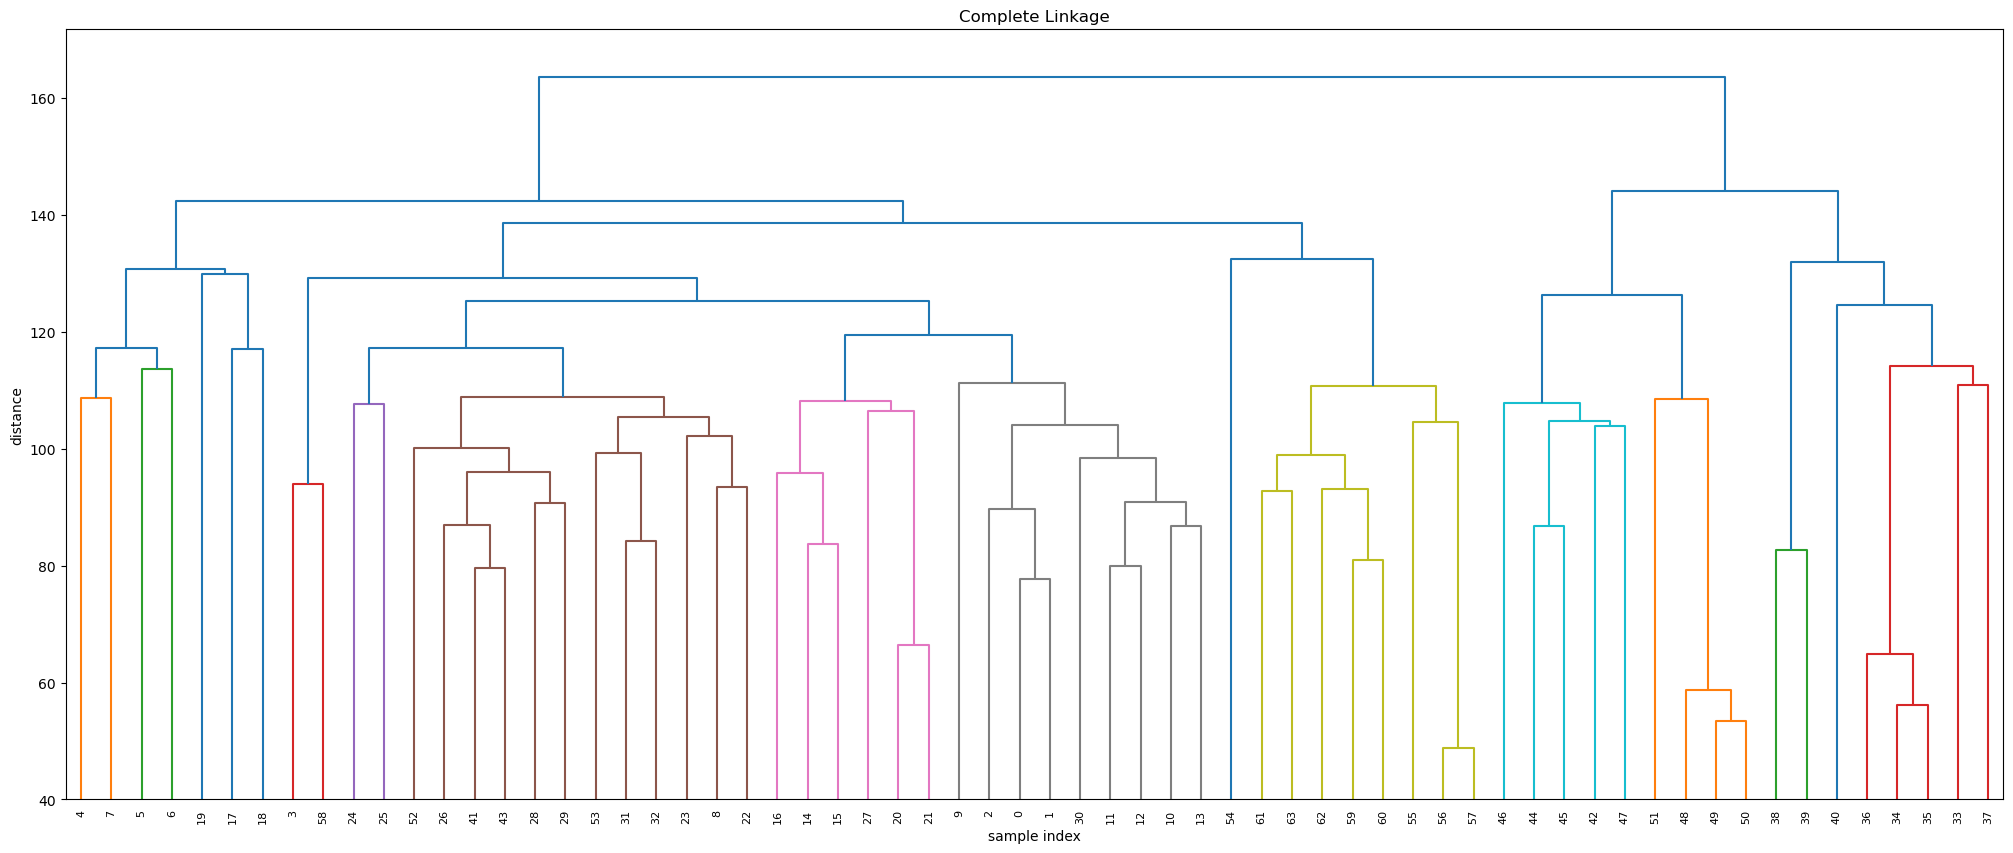

In [67]:
plt.figure(figsize=(25, 10))
plt.title('Complete Linkage')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    linkage(sd_data, 'complete'),
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)
plt.ylim(40)
plt.show()

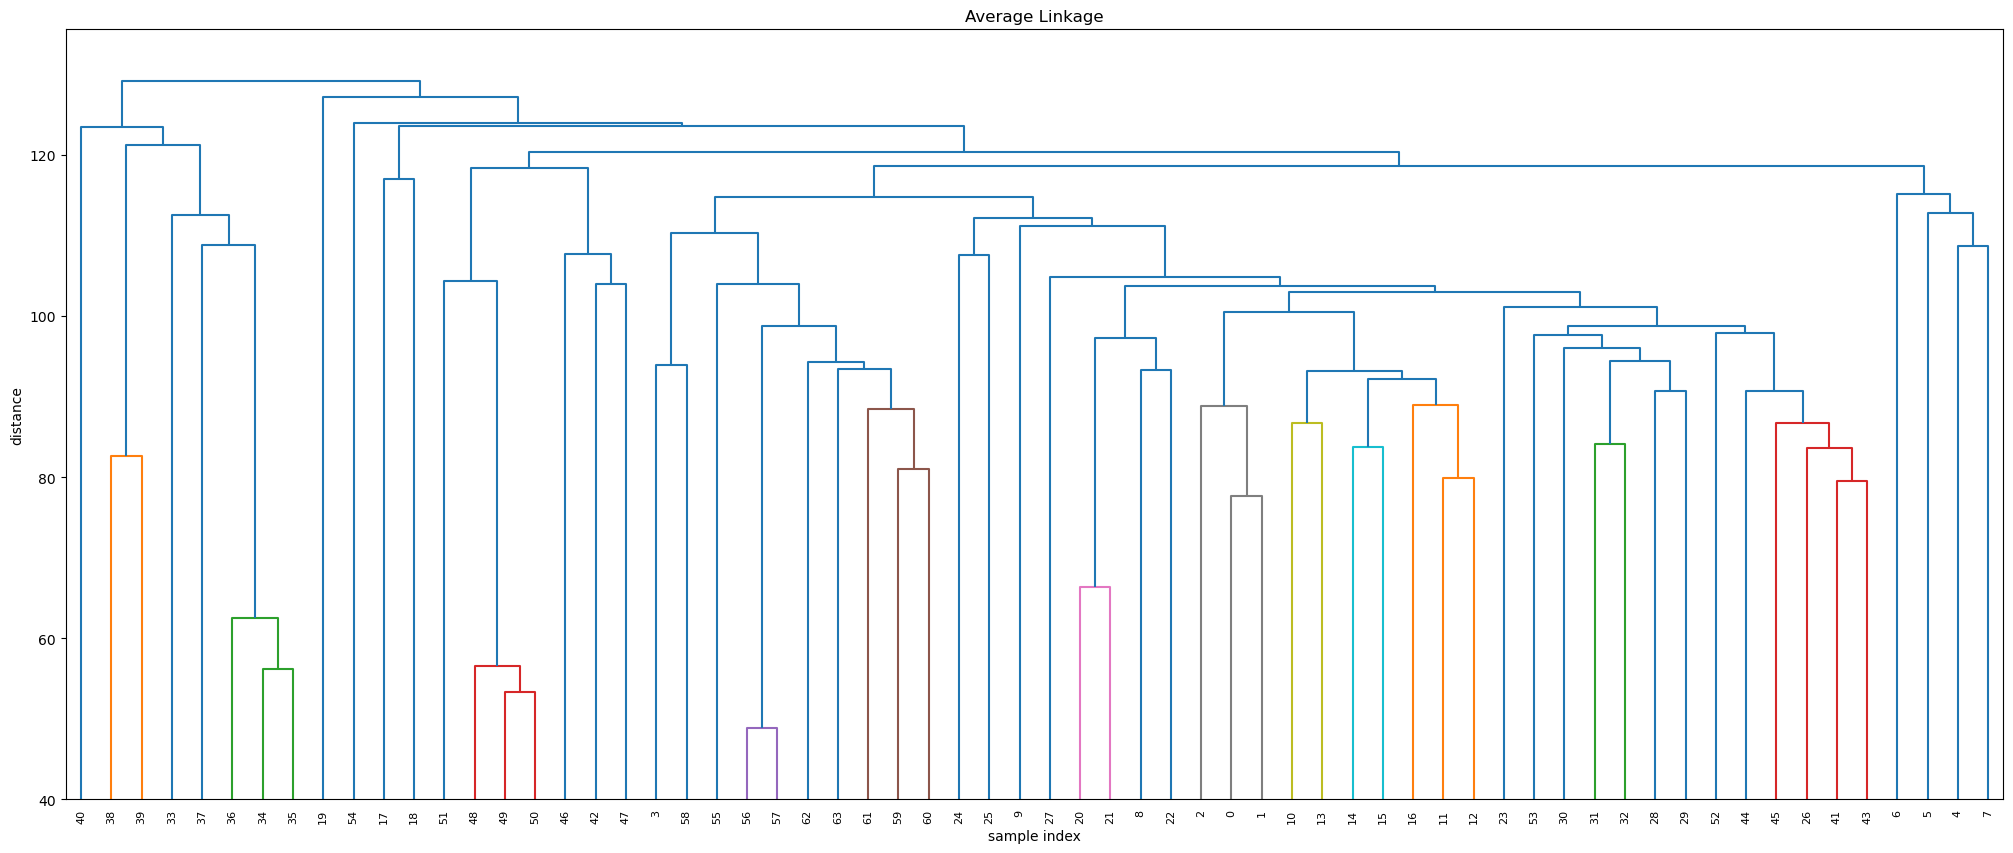

In [68]:
plt.figure(figsize=(25, 10))
plt.title('Average Linkage')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    linkage(sd_data, 'average'),
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)
plt.ylim(40)
plt.show()

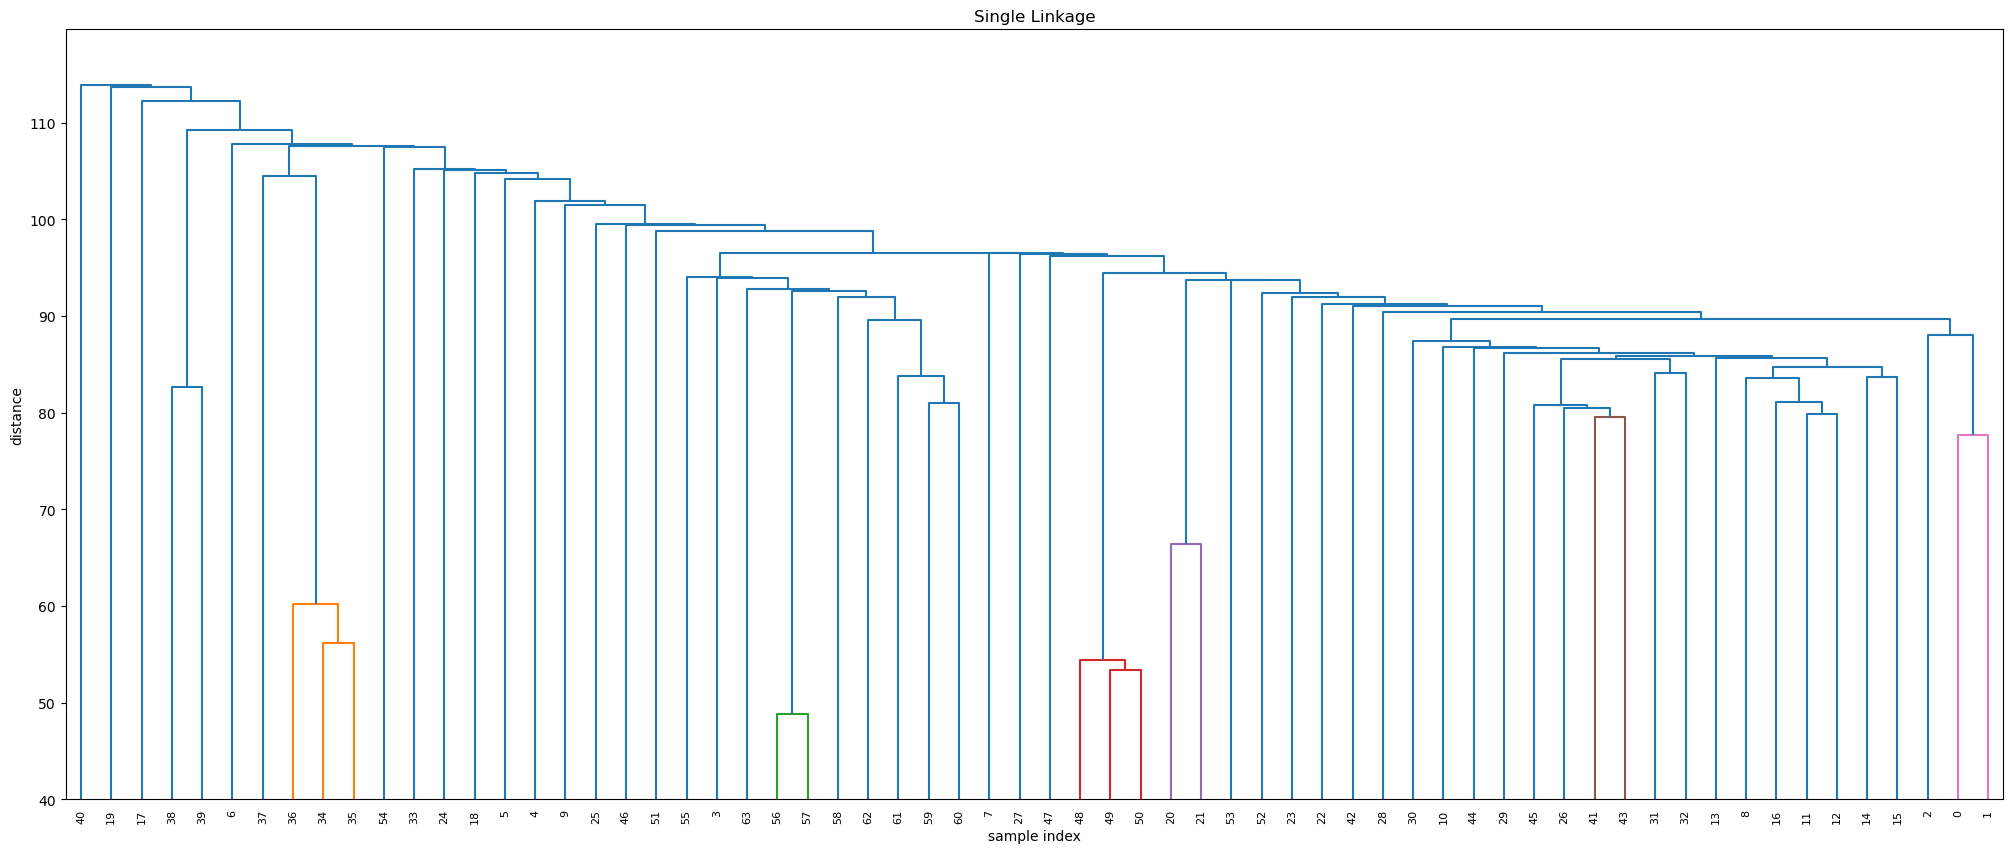

In [69]:
plt.figure(figsize=(25, 10))
plt.title('Single Linkage')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    linkage(sd_data, 'single'),
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)
plt.ylim(40)
plt.show()

In [70]:
hc = linkage(sd_data, 'complete')
hc_clusters = cut_tree(hc, 4).squeeze()
pd.DataFrame({'Labs': nci_labs, 'Cluster': hc_clusters+1})

,Labs,Cluster
V1,CNS,1
V2,CNS,1
V3,CNS,1
V4,RENAL,1
V5,BREAST,2
...,...,...
V60,MELANOMA,1
V61,MELANOMA,1
V62,MELANOMA,1
V63,MELANOMA,1


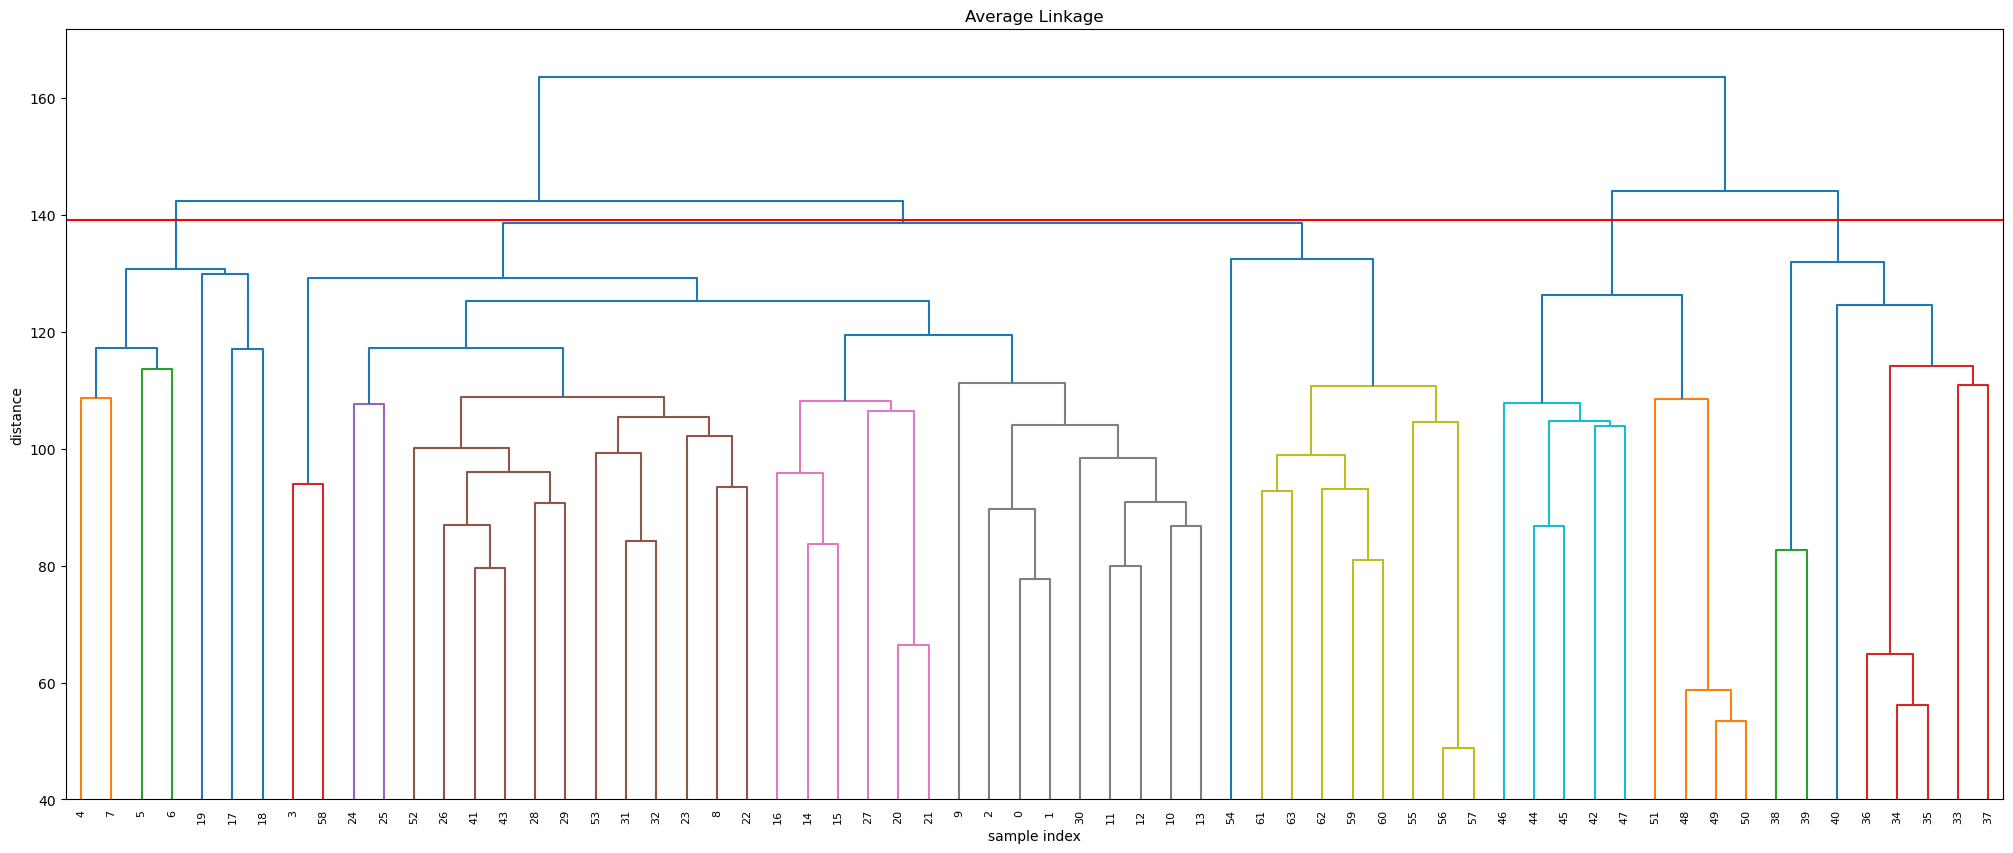

In [71]:
plt.figure(figsize=(25, 10))
plt.title('Average Linkage')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    hc,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)
plt.ylim(40)
plt.axhline(139, c='red')
plt.show()

In [72]:
km = KMeans(n_clusters=4, n_init=20, random_state=2).fit(sd_data)

F:\anacoda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [73]:
km_clusters = km.labels_

In [74]:
pd.crosstab(km_clusters + 1, hc_clusters + 1, 
            rownames = ['K-Means'], colnames = ['Hierarchical'])

Hierarchical,1,2,3,4
K-Means,,,,
1,4,0,0,9
2,27,7,1,0
3,0,0,7,0
4,9,0,0,0


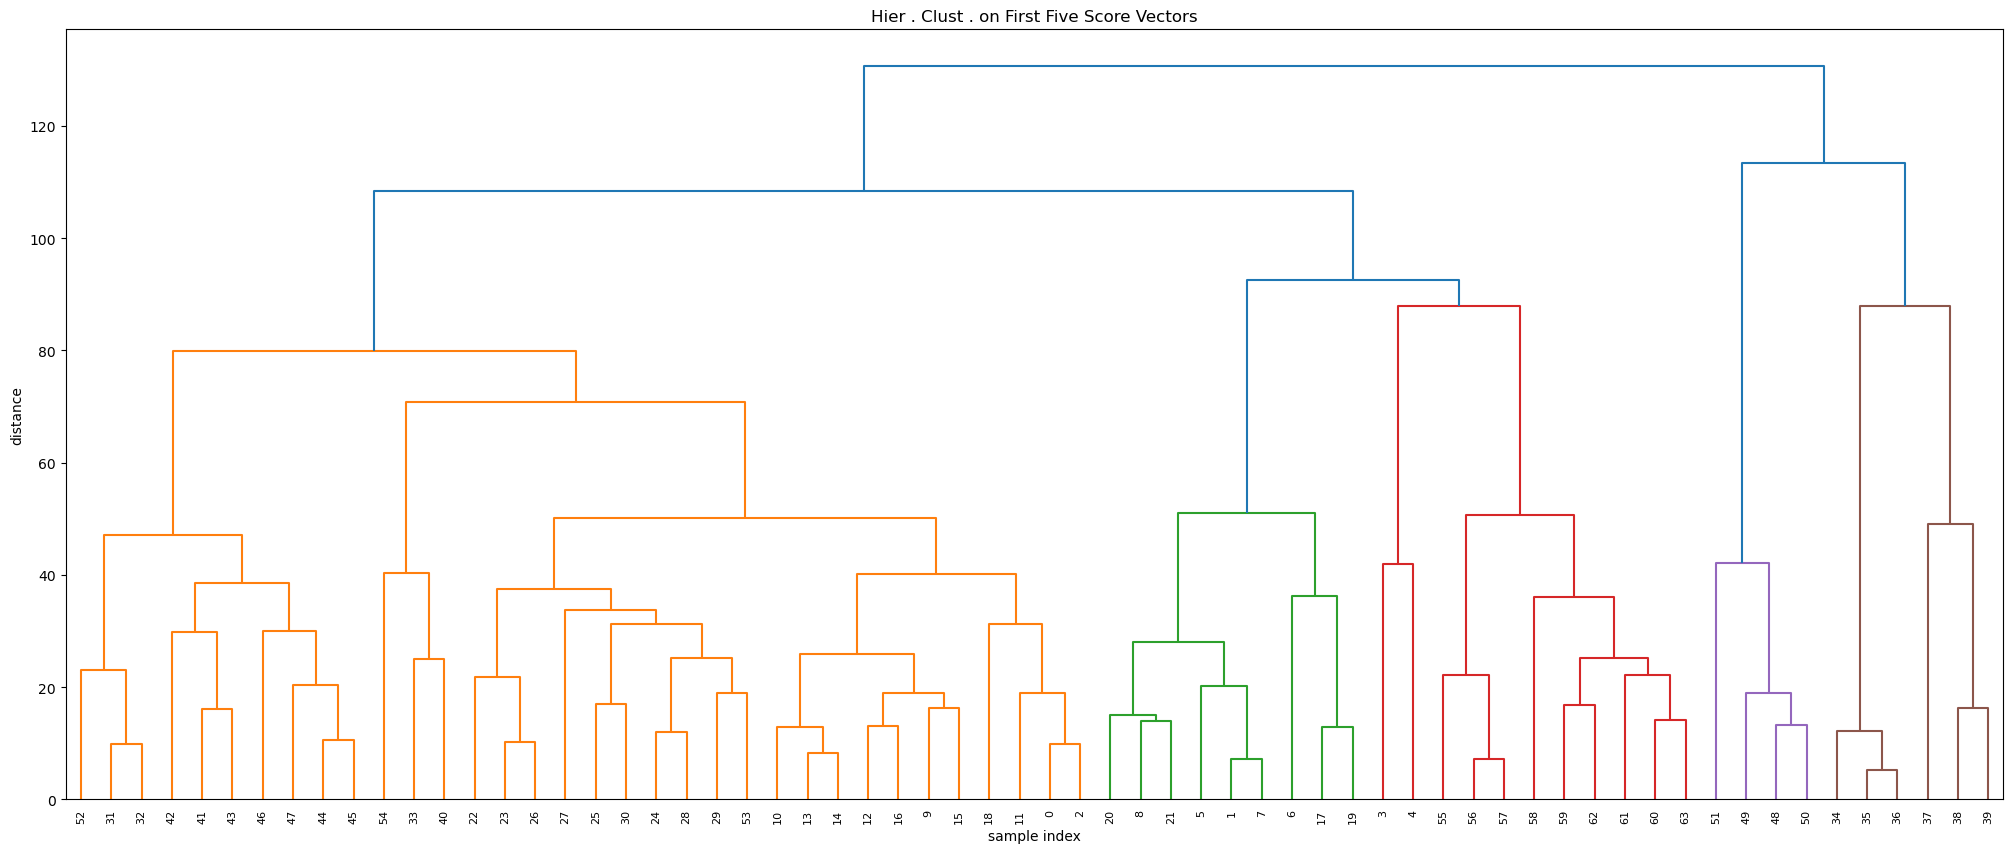

In [75]:
hc = linkage(pr_out[:, :5], 'complete')

plt.figure(figsize=(25, 10))
plt.title('Hier . Clust . on First Five Score Vectors')
plt.xlabel('sample index')
plt.ylabel('distance')

dendrogram(
    hc,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)
plt.show()

In [76]:
pd.DataFrame({'Labs': nci_labs, 'Cluster': cut_tree(hc, 4).squeeze() + 1})

,Labs,Cluster
V1,CNS,1
V2,CNS,2
V3,CNS,1
V4,RENAL,2
V5,BREAST,2
...,...,...
V60,MELANOMA,2
V61,MELANOMA,2
V62,MELANOMA,2
V63,MELANOMA,2
